<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_QuantumTeleportation_01_DeepSeek_mkbahk_20250318.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=174f783b9875a81efd7df2c6567a1401eefde3bc5d3bceda9ea368dd9ba0b87f
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 86.8 MB/s eta 0:00:00
  Cloning https://github.com/qis

In [3]:
%pip show qiskit
%pip show qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-textbook
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [57]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from IPython.display import display, Math
import numpy as np
from qiskit.quantum_info import Statevector

# Quantum Teleportation: q[0]의 상태값을 q[1]에 복사시키는 것
## 왜, 양자역할이론에서 복사불가정리(no-cloning theorem)에 의하여 Qubit간에 복사가 되지 않는데, 복사는 하는 효과를 낼 수 있음.

In [77]:
# 양자 텔레포테이션 회로 생성
qc = QuantumCircuit(3, 3)

# Step 1: 얽힘 상태 생성 (Alice와 Bob의 큐비트를 얽힘 상태로 만듦)
qc.h(1)
qc.cx(1, 2)

# Step 2: Alice가 전송할 큐비트를 준비 (예: |1> 상태)
qc.x(0)

# Step 3: Alice가 전송할 큐비트와 얽힘 상태를 결합
qc.cx(0, 1)
qc.h(0)

# Step 4: Alice가 측정하여 고전적 정보를 Bob에게 전송
qc.measure(0, 0)
qc.measure(1, 1)

# Step 5: Bob이 고전적 정보를 받아 큐비트를 복원
qc.cx(1, 2)
qc.cz(0, 2)

# Step 6: Bob의 큐비트 측정
qc.measure(2, 2)


In [78]:
# 시뮬레이터로 실행
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(qc, shots=1024).result()

Counts: {'110': 265, '100': 247, '111': 263, '101': 249}


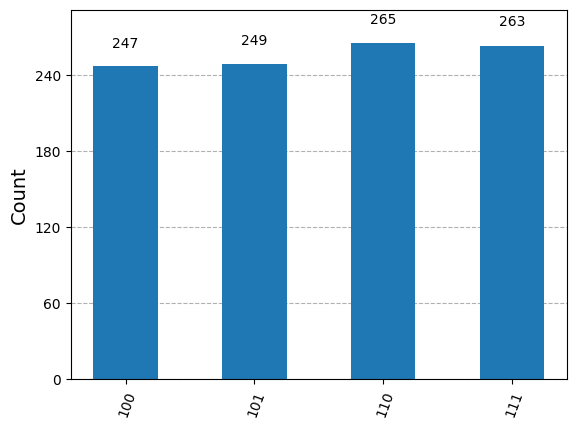

In [79]:
# 결과 출력
counts = result.get_counts(qc)
print("Counts:", counts)
plot_histogram(counts)

# 결과를 해석하는 법

# 위 결과 중 두번째와 "101"과 마지막 "111"의 경우 큐빗 순서는 q[2], q[1], q[0] 순입니다. 즉, 마지막 숫자가 "1", q[0]가 "1"인 경우는 반드시 첫번째 숫자는 "1"입니다. 마지막 숫자가 "0"인 경우는 무시하면 됨